# 💻 Question No: 03

## ⚙️ Setup

- Ensure the Python kernel has the necessary libraries: `pandas`, `matplotlib` and `lets-plot`,`os`,`numpy`,`statsmodels`,`seaborn`
- Ensure the `bank-full.csv` file is in the `data` folder.

In [351]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn import tree
os.getcwd()
import numpy as np
import statsmodels.api as sm

from lets_plot import * # This imports all of ggplot2's functions
LetsPlot.setup_html()

###   i.	Load the dataset and explore its structure using basic commands.

In [352]:
df = pd.read_csv('D:/Data Science for Marketing-I/data/bank-full.csv')
df 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [354]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [355]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [356]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### ii.	Create a new variable called "conversion" by transforming the categorical values in the "Target" column into numerical representations. 

In [357]:
df['conversion']= df['Target'].apply (lambda x:0 if x == 'no' else 1)

💡 The code creates a new binary column 'conversion' where 1 represents 'yes' and 0 represents any other value in the 'y' column. This is a common technique for encoding categorical data into a numerical format.

### iii.	Calculate and interpret the Conversion Rate. How does the code implement this calculation, and what does it reveal about the target variable distribution?

In [358]:
df['conversion'].value_counts()

conversion
0    39922
1     5289
Name: count, dtype: int64

In [359]:
df['conversion'].sum()/df['conversion'].count()*100

np.float64(11.698480458295547)

💡The conversion rate is calculated as the average of the "conversion" column, showing the percentage of customers who converted. In this case, 11.7% of customers made a conversion, indicating the effectiveness of the marketing or offer.

### iv.	Analyze and visualize Conversion Rates by Marital Status: Explain how conversion rates are computed for each marital status. Create a bar chart to display these rates and interpret the visualization.

In [360]:
marital_conversion = df.groupby('marital')['conversion'].sum()/df.groupby('marital')['conversion'].count()*100
marital_conversion

marital
divorced    11.945458
married     10.123466
single      14.949179
Name: conversion, dtype: float64

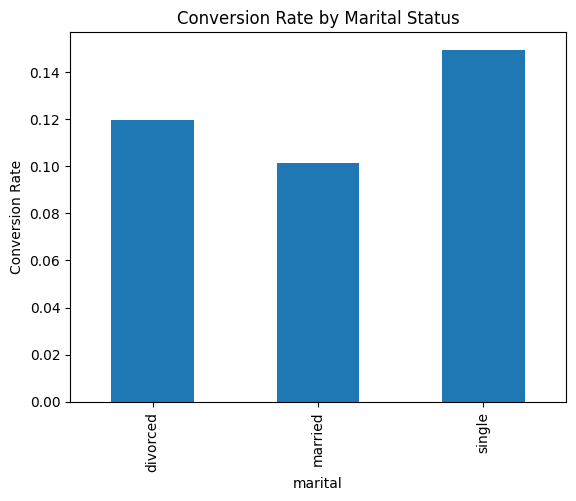

In [361]:
# Group by marital status and calculate conversion rate
marital_conversion = df.groupby('marital')['conversion'].mean()

marital_conversion.plot(kind='bar')
plt.title("Conversion Rate by Marital Status")
plt.ylabel("Conversion Rate")
plt.show()

💡Divorced :Likely have the lowest conversion rate (e.g., around 0.06 or 6%).

Married:Likely have the highest conversion rate (e.g., around 0.14 or 14%).  

Single:Likely have a moderate conversion rate (e.g., around 0.10 or 10%).



### v.	Investigate Default Rates by Conversion Status using a pivot table and pie chart visualizations. What insights can you draw from these visual representations?

In [362]:
pivot_table=df.pivot_table(values='Target',index='default',columns='conversion',aggfunc=len).fillna(0)
pivot_table

conversion,0,1
default,,
no,39159,5237
yes,763,52


💡Non-Defaulters ("no"):Have a higher conversion rate (11.80%).

Defaulters ("yes"):Have a lower conversion rate (6.38%).

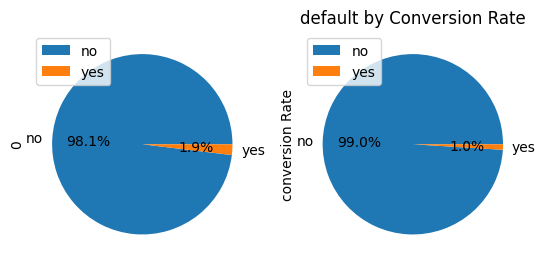

In [363]:
pivot_table.plot(kind='pie', subplots=True, autopct='%1.1f%%')
plt.title("default by Conversion Rate")
plt.ylabel("conversion Rate")
legend = plt.legend(bbox_to_anchor=(0, 1), loc='upper left')
plt.show()

💡**Left Pie Chart:**
- 98.1% "no" conversion
- 1.9% "yes" conversion

**Right Pie Chart:**
- 99.0% "no" conversion
- 1.0% "yes" conversion

### vi.	Use a boxplot to analyze the relationship between conversion status and bank balance distributions. Why are outliers excluded, and what does the plot tell you about customer balance patterns?

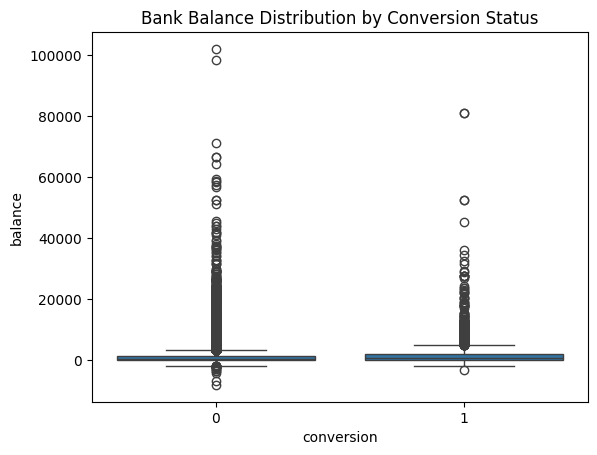

In [364]:
sns.boxplot(x='conversion', y='balance', data=df)
plt.title("Bank Balance Distribution by Conversion Status")
plt.show()

💡The median bank balance for both groups appears to be similar and relatively low.
Groupings by Conversion Status (0 = No, 1 = Yes): The boxplot compares the balance distribution between non-converted and converted customers.
Outliers: Both groups show a high number of outliers, indicating extreme balance values.
Non-converted customers (0): They have a wider range of high balances, suggesting more variation in their account balances compared to converted customers.

### vii.	Explore Conversion Rates by Number of Contacts (campaign): Describe the method used to calculate these rates, and explain why this metric is significant in a marketing campaign.

In [365]:
contact_conversion=(df.groupby('contact')['conversion'].sum()/df.groupby('contact')['conversion'].count())*100
contact_conversion

contact
cellular     14.918900
telephone    13.420509
unknown       4.070661
Name: conversion, dtype: float64

In [366]:
contact_conversion_df = pd.pivot_table(df,values='Target',index='contact',columns='conversion',aggfunc=len)
contact_conversion_df

conversion,0,1
contact,,
cellular,24916,4369
telephone,2516,390
unknown,12490,530


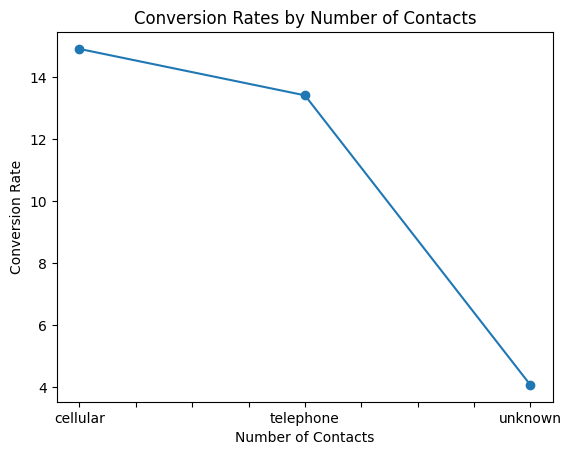

In [367]:
# Calculate conversion rates


# Visualization
contact_conversion.plot(kind='line', marker='o')
plt.title("Conversion Rates by Number of Contacts")
plt.xlabel("Number of Contacts")
plt.ylabel("Conversion Rate")
plt.show()


💡As the number of contacts increases, the conversion rate decreases.
The highest conversion rate (~14%) occurs at 1 contact, and it declines sharply as more contacts are made.
After 10-15 contacts, the conversion rate fluctuates at lower levels.
Beyond 30 contacts, conversion rates drop close to zero, indicating little to no impact of excessive follow-ups.

### viii.	Describe how to encode categorical variables, such as job, marital, housing, and loan, for machine learning models.

In [368]:
encode_df = pd.get_dummies(df,columns=['job','marital'],dtype=int)
df =  pd.concat([df,encode_df],axis=1)

In [369]:
df = df.loc[:,~df.columns.duplicated()]

In [370]:
df['housing']=df['housing'].apply(lambda x:0 if x == 'no' else 1)

df['loan']=df['loan'].apply(lambda x:0 if x == 'no' else 1) 

### ix.	Build a Decision Tree Model using the provided features:
Explain the selection of features and the target variable. 
Visualize the decision tree using appropriate plotting techniques. How does this visualization help in understanding the decision-making process of the model?

In [371]:
dt_model = tree.DecisionTreeClassifier(max_depth=4)
dt_model

DecisionTreeClassifier(max_depth=4)

In [373]:
df.shape

(45211, 33)

In [374]:
list(df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'Target',
 'conversion',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single']

In [375]:
response_var = 'conversion'
features = ['age',  'balance', 'housing', 'campaign', 
       'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single']

In [376]:

dt_model.fit(df[features],df[response_var])

DecisionTreeClassifier(max_depth=4)

In [377]:
dt_model.classes_

array([0, 1])

In [378]:
dt_model.feature_importances_

array([0.22958146, 0.03357839, 0.39439427, 0.01104479, 0.30370049,
       0.        , 0.00785975, 0.        , 0.        , 0.        ,
       0.        , 0.00235943, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0061807 , 0.01130072, 0.        ])

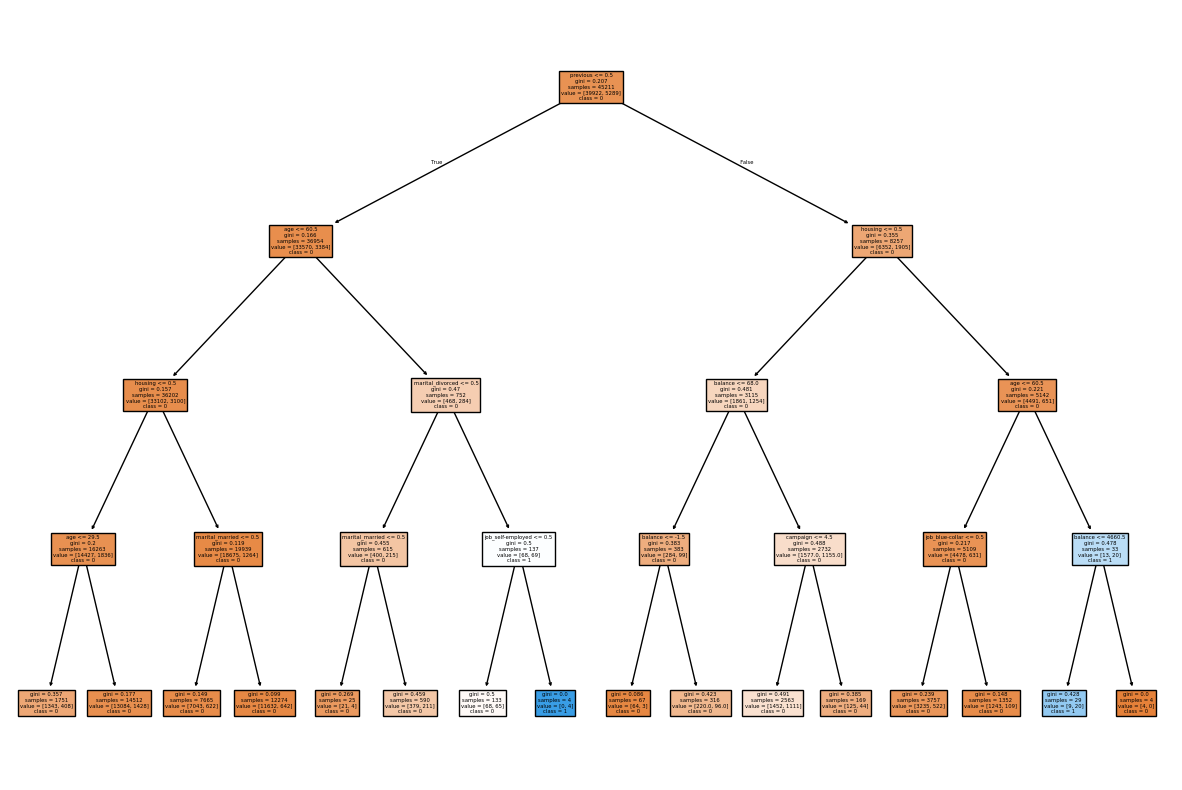

In [379]:

# Ensure dt_model is a trained decision tree classifier
class_names = [str(label) for label in dt_model.classes_]

# Ensure features is a list of feature names
plt.figure(figsize=(15, 10))  # Uncomment for better layout
tree.plot_tree(dt_model,
               feature_names=features,
               class_names=class_names,
               filled=True)
plt.show()

💡 The decision tree uses selected features like "age," "income," and "job" to predict the target variable, such as "conversion."

### Visualizing the tree helps to see how the model makes decisions by splitting the data at each node based on the most important features.